# HW_06 by Andrew Lee

Import Data

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./dataset/wentworth_applied_analytics - segmentation.csv.csv')

# df[['web1_session', 'web2_repeat_visit', 'cart3_items', 'cart4_checkout']] = df[['web1_session', 'web2_repeat_visit', 'cart3_items', 'cart4_checkout']].astype(int)
# remove non-numeric character
df['request_amount'] = [float(x[1:].replace(',', '')) for x in df['request_amount']]
df['nslp_percent'] = [float(x[:-1].replace(',', '')) for x in df['nslp_percent']]
# exchange dummy var
indep_df = pd.get_dummies(df[['locale','status']])
df=pd.concat([df, indep_df], axis=1)
df.head(3)

,application_number,funding_year,state,form_version,window_status,status,category,application_name,address1,city,...,applicant_type,enrollment,nslp_count,nslp_percent,locale,request_amount,congress_district,locale_Rural,locale_Urban,status_Certified
0,201001330,2020,OH,Original,In Window,Certified,Category1,Bath Local School,2650 Bible Rd,Lima,...,School District,1716,759,44.0,Urban,15840.00,Congressional District 4,0,1,1
1,201001293,2020,OH,Original,In Window,Certified,Category1,Federal Hocking Local Sch Dist,8461 State Route 144,Stewart,...,School District,1041,746,72.0,Rural,40643.52,Congressional District 15,1,0,1
2,201000596,2020,OH,Original,In Window,Certified,Category1,Independence School District,7733 Stone Rd,Cleveland,...,School District,1029,90,9.0,Urban,15160.03,Congressional District 14,0,1,1


## Are there statistically significant or experimentally important differences based on the “status” of an application for the following dependent variables: enrollment, nslp_count, nslp_percent, and request_amount?

Assume the the significance level is 0.05

#### ANOVA Test with dependenet variable(locate)

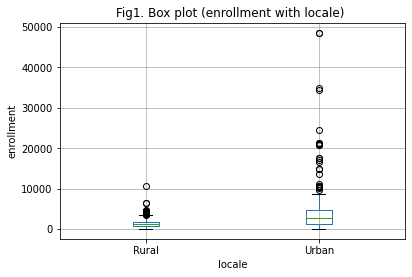

In [20]:
# Filter out records with current_spend equal to 0
df.boxplot(column='enrollment', by='locale')
plt.xlabel('locale')
plt.ylabel('enrollment')
plt.suptitle('')
plt.title("Fig1. Box plot (enrollment with locale) ")
plt.show()

In [76]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('enrollment')
import statsmodels.api as sm
from statsmodels.formula.api import ols
# fit a one-way ANOVA model with independent variable 'group' and dependent variable 'outcome'
model = ols('locale_Rural~enrollment',data=df).fit()
# outcome variable = your dependent variable
# groug variable = your dependent variable
# not that the notation/syntax we are using for this package is slightly different from what you may be used to

# perform an ANOVA on the model
anova_table = sm.stats.anova_lm(model, typ=2)

# print the result
print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")



enrollment
                sum_sq     df          F        PR(>F)
enrollment   21.899894    1.0  99.072914  4.530669e-22
Residual    174.849161  791.0        NaN           NaN
There is a significant difference between the means of the data sets.


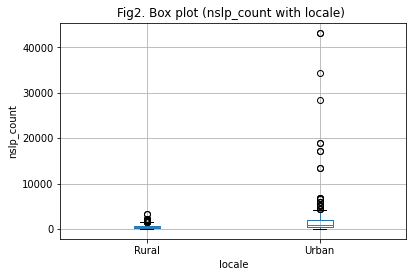

In [23]:
df.boxplot(column='nslp_count', by='locale')
plt.xlabel('locale')
plt.ylabel('nslp_count')
plt.suptitle('')
plt.title("Fig2. Box plot (nslp_count with locale) ")
plt.show()

In [75]:
# enrollment, nslp_count, nslp_percent, and request_amount
print('nslp_count')
model = ols('locale_Rural~nslp_count',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

nslp_count
                sum_sq     df          F        PR(>F)
nslp_count    9.766639    1.0  41.316248  2.236804e-10
Residual    186.982415  791.0        NaN           NaN
There is a significant difference between the means of the data sets.


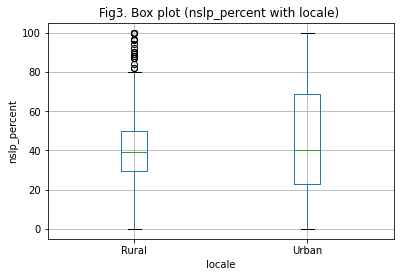

In [24]:
df.boxplot(column='nslp_percent', by='locale')
plt.xlabel('locale')
plt.ylabel('nslp_percent')
plt.suptitle('')
plt.title("Fig3. Box plot (nslp_percent with locale) ")
plt.show()

In [71]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('nslp_percent')
model = ols('locale_Rural~nslp_percent',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

nslp_percent
                  sum_sq     df         F    PR(>F)
nslp_percent    1.924014    1.0  7.811599  0.005317
Residual      194.825040  791.0       NaN       NaN
There is a significant difference between the means of the data sets.


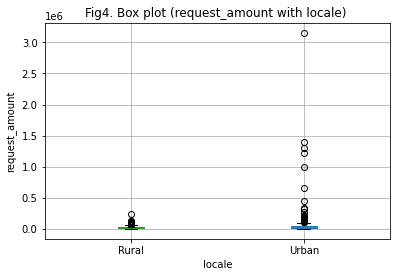

In [26]:

df.boxplot(column='request_amount', by='locale')
plt.xlabel('locale')
plt.ylabel('request_amount')
plt.suptitle('')
plt.title("Fig4. Box plot (request_amount with locale) ")
plt.show()

In [70]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('request_amount')
model = ols('locale_Rural~request_amount',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

request_amount
                    sum_sq     df          F    PR(>F)
request_amount    3.566659    1.0  14.603958  0.000143
Residual        193.182395  791.0        NaN       NaN
There is a significant difference between the means of the data sets.


From above 4 anova results, there are significant difference based on the “locate” of an application for enrollment, nslp_count, nslp_percent, and request_amount.

#### ANOVA Test with dependenet variable(status)

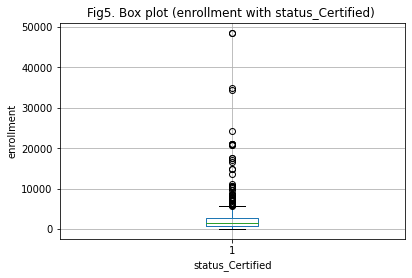

In [27]:

df.boxplot(column='enrollment', by='status_Certified')
plt.xlabel('status_Certified')
plt.ylabel('enrollment')
plt.suptitle('')
plt.title("Fig5. Box plot (enrollment with status_Certified) ")
plt.show()

In [77]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('enrollment')
model = ols('status_Certified~enrollment',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

enrollment
                  sum_sq     df          F        PR(>F)
enrollment  1.289607e-29    1.0  70.176069  2.461102e-16
Residual    1.453599e-28  791.0        NaN           NaN
There is a significant difference between the means of the data sets.


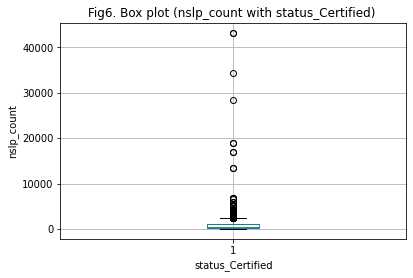

In [28]:
df.boxplot(column='nslp_count', by='status_Certified')
plt.xlabel('status_Certified')
plt.ylabel('nslp_count')
plt.suptitle('')
plt.title("Fig6. Box plot (nslp_count with status_Certified) ")
plt.show()

In [78]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('nslp_count')
model = ols('status_Certified~nslp_count',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

nslp_count
                  sum_sq     df         F   PR(>F)
nslp_count  1.379360e-31    1.0  2.804765  0.09438
Residual    3.890070e-29  791.0       NaN      NaN
There is no significant difference between the means of the data sets.


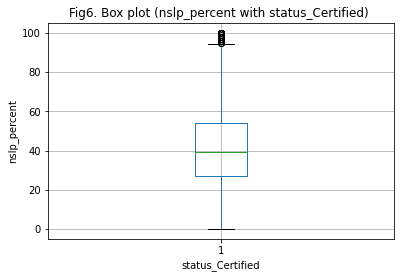

In [29]:
df.boxplot(column='nslp_percent', by='status_Certified')
plt.xlabel('status_Certified')
plt.ylabel('nslp_percent')
plt.suptitle('')
plt.title("Fig6. Box plot (nslp_percent with status_Certified) ")
plt.show()

In [79]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('nslp_percent')
model = ols('status_Certified~nslp_percent',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

nslp_percent
                    sum_sq     df          F        PR(>F)
nslp_percent  1.530101e-29    1.0  30.627579  4.252875e-08
Residual      3.951700e-28  791.0        NaN           NaN
There is a significant difference between the means of the data sets.


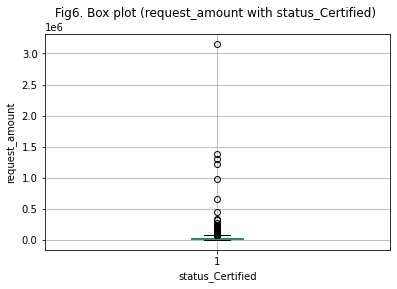

In [30]:
df.boxplot(column='request_amount', by='status_Certified')
plt.xlabel('status_Certified')
plt.ylabel('request_amount')
plt.suptitle('')
plt.title("Fig6. Box plot (request_amount with status_Certified) ")
plt.show()

In [80]:
# enrollment, nslp_count, nslp_percent, and request_amount 
print('request_amount')
model = ols('status_Certified~request_amount',data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
pv = anova_table['PR(>F)'][0]

if pv < 0.05:
    print("There is a significant difference between the means of the data sets.")
else:
    print("There is no significant difference between the means of the data sets.")

request_amount
                      sum_sq     df         F    PR(>F)
request_amount  7.843811e-32    1.0  1.594947  0.206993
Residual        3.890070e-29  791.0       NaN       NaN
There is no significant difference between the means of the data sets.


From above 4 anova results, there are significant difference based on the “locate” of an application for nslp_percent and enrollment.